# MIT License

Copyright (c) 2021 Priyanka Dilip Shinde And Sangram Vuppala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Abstract

About Data: The training dataset is a text file of The Adventures of Sherlock Holmes book.

Aim: To build a LSTM model to predict next word of the text.

Loaded Libraries and importing the dataset, creating features dictionary sequences, encoding it into the integer form with the help of the Tokenizer, splitting the sequences into the inputs and output, converting our output labels into one-hot vectors, building LSTM model, Training model, Evaluating model's performance.

# Loading Libraries

In [1]:
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import re
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path = 'new3.txt'
text = open(path).read().lower()

# Data Pre-processing

In [3]:
cleaned_text = re.sub(r'\W+', ' ', text).lower()
tokens = word_tokenize(cleaned_text)
train_length = 4
txt_seq = []

In [4]:
for i in range(train_length,len(tokens)):
    sequence = tokens[i-train_length:i]
    txt_seq.append(sequence)

In [5]:
seqs = {}
cnt = 1
for i in range(len(tokens)):
    if tokens[i] not in seqs:
        seqs[tokens[i]] = cnt
        cnt += 1

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(txt_seq)
seqs = tokenizer.texts_to_sequences(txt_seq)

In [7]:
vocab_size = len(tokenizer.word_counts)+1
n_seqs = np.empty([len(seqs),train_length], dtype='int32')

In [8]:
for i in range(len(seqs)):
    n_seqs[i] = seqs[i]

## Splitting the sequences into the inputs and output labels and converting our output labels into one-hot vectors

In [9]:
input_1 = n_seqs[:,:-1]
target_1 = n_seqs[:,-1]
target_1 = to_categorical(target_1, num_classes=vocab_size)
seq_len = input_1.shape[1]

# Building the Model

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, seq_len, input_length=seq_len))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50,activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_1,target_1,epochs=50,verbose=1).history

/Users/priyankashinde/opt/anaconda3/envs/myenvi/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
109277/109277 [==============================] - 137s 1ms/step - loss: 6.6026 - accuracy: 0.0531
Epoch 2/50
109277/109277 [==============================] - 191s 2ms/step - loss: 6.2202 - accuracy: 0.0608
Epoch 3/50
109277/109277 [==============================] - 150s 1ms/step - loss: 5.9384 - accuracy: 0.0822
Epoch 4/50
109277/109277 [==============================] - 159s 1ms/step - loss: 5.7023 - accuracy: 0.0981
Epoch 5/50
109277/109277 [==============================] - 150s 1ms/step - loss: 5.5300 - accuracy: 0.1082
Epoch 6/50
109277/109277 [==============================] - 156s 1ms/step - loss: 5.3795 - accuracy: 0.1157
Epoch 7/50
109277/109277 [==============================] - 160s 1ms/step - loss: 5.2506 - accuracy: 0.1216
Epoch 8/50
109277/109277 [==============================] - 579s 5ms/step - loss: 5.1456 - accuracy: 0.1261
Epoch 9/50
109277/109277 [==============================] - 191s 2ms/step - loss: 5.0600 - accuracy: 0.1292
Epoch 10/50
109277/109277 [=

# Plotting Accuracy and loss

Text(0.5, 0, 'epoch')

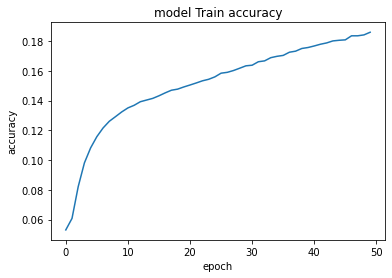

In [12]:
plt.plot(history['accuracy'])
plt.title('model Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

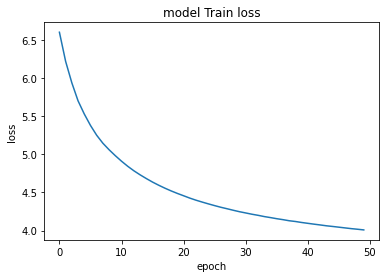

In [13]:
plt.plot(history['loss'])
plt.title('model Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Predicting the next word

In [18]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    pred_word = tokenizer.index_word[i]
    print("Next word suggestion:",pred_word)


I had seen
[3, 19, 185] [[  3  19 185]]
Next word suggestion: it
Next word suggestion: to
Next word suggestion: of


# Conclusion

LSTM model with Embedding layer, two LSTM layers and tow dense layers with 50 epochs gives accuracy of 18% and the accuracy plot shows that the model's performance or accuracy can be improved by increasing the number of epochs.

# References

1. https://www.analyticsvidhya.com/blog/2021/08/predict-the-next-word-of-your-text-using-long-short-term-memory-lstm/

2. https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

3. https://www.hindawi.com/journals/wcmc/2021/5886119/![image.png](attachment:image.png)

4. https://towardsdatascience.com/next-word-prediction-with-nlp-and-deep-learning-48b9fe0a17bf